In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("myopia.csv")
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [8]:
print(len(df))
df.drop_duplicates()
df.dropna()
print(len(df))

618
618


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("MYOPIC", axis=1))
print(scaled_data)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


In [19]:
scaled_data.shape

(618, 14)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
comps = pca.fit_transform(scaled_data)
comps.shape

(618, 10)

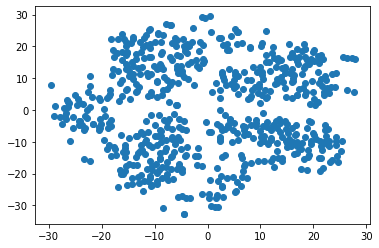

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(comps)
x_plot = [item[0] for item in tsne]
y_plot = [item[1] for item in tsne]
plt.scatter(x_plot,y_plot)
plt.show()